# Project description
Write something here

# Create new Conda environment (optional)
You can run with the following command in your conda terminal:
```bash
!conda env create -f environments.yaml
```
Or run the following cell to create a new conda environment.

In [1]:
# uncomment the following line to install the environment
# !conda env create -f environments.yaml
# !conda activate cv_term_project

# Install important packages

In [2]:
# check your Nvidia GPU
!nvidia-smi

Sun May 12 15:28:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   58C    P8              8W /   64W |     514MiB /   4096MiB |     40%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Install PyTorch macthing with your CUDA version
You can check the compatible version of PyTorch with your CUDA version [here](https://pytorch.org/get-started/locally/)

In [3]:
# for my machine (RTX 3050 Laptop)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [1]:
# check CUDA device
import torch
print(torch.__version__)
print(torch.cuda.get_device_name(0))

2.2.2+cu121
NVIDIA GeForce RTX 3050 Laptop GPU


### Other packages

In [5]:
!pip install ipywidgets tqdm numpy matplotlib scikit-learn opencv-python pandas pillow kaggle ultralytics gdown PyYAML

In [1]:
import os
import shutil
import zipfile
import json
import random

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import cv2
import sklearn

In [4]:
# set random seed
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

# Download dataset from Kaggle
Please put the kaggle.json into the same directory of this notebook

In [8]:
# check if the kaggle.json file exists
from sys import platform

# Windows
# C:\Users\<Windows-username>\.kaggle\kaggle.json
if platform == "win32":
    print("Windows")
    kaggle_json_path = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
    if os.path.exists(kaggle_json_path):
        print("kaggle.json exists")
    else:
        print("kaggle.json does not exist")
        shutil.copy("./kaggle.json", kaggle_json_path)
        print("kaggle.json is copied to the directory")

# Linux
# ~/.kaggle/kaggle.json
elif platform == "linux" or platform == "linux2":
    print("Linux")
    kaggle_json_path = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
    if os.path.exists(kaggle_json_path):
        print("kaggle.json exists")
    else:
        print("kaggle.json does not exist")
        os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)
        shutil.copy("./kaggle.json", kaggle_json_path)
        print("kaggle.json is copied to the directory")

# macOS
# ~/.kaggle/kaggle.json
elif platform == "darwin":
    print("macOS")
    kaggle_json_path = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
    if os.path.exists(kaggle_json_path):
        print("kaggle.json exists")
    else:
        print("kaggle.json does not exist")
        os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)
        shutil.copy("./kaggle.json", kaggle_json_path)
        print("kaggle.json is copied to the directory")

Windows
kaggle.json exists


In [9]:
# download and unzip the dataset
if(os.path.exists("./rice-image-dataset-for-object-segmentation")):
    print("The dataset is already downloaded")
else:
    !kaggle datasets download -d alikhalilit98/rice-image-dataset-for-object-segmentation
    with zipfile.ZipFile("rice-image-dataset-for-object-segmentation.zip", 'r') as zip_ref:
        zip_ref.extractall("./rice-image-dataset-for-object-segmentation")

The dataset is already downloaded


# Data Preprocessing
The dataset is not appropriate for image segmentation because each image has a single object. We need to synthesize the dataset to have multiple objects in each image.

The current format of the label is in the "labelme" format. We need to convert them to the YOLO segmentation format.

./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg\Arborio\Arborio (10366).jpg
249
(250, 250, 3)


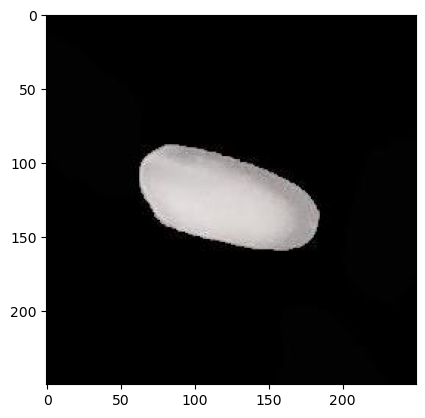

In [10]:
# let's take a look at the dataset
base_path = "./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg"
type_list = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]
random_type_path = os.path.join(base_path, random.choice(type_list))
random_image_path = os.path.join(random_type_path, random.choice([f for f in os.listdir(random_type_path) if f.endswith(".jpg")]))

image = cv2.imread(random_image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
print(random_image_path)

print(np.max(image))
print(image.shape)

In [11]:
# label of the image
random_json_path = random_image_path.replace(".jpg", ".json")
with open(random_json_path) as f:
    data = json.load(f)
    display(data)

{'version': '5.0.2',
 'flags': {},
 'shapes': [{'label': 'Arborio',
   'points': [[81, 88],
    [79, 90],
    [78, 89],
    [77, 90],
    [76, 90],
    [75, 91],
    [74, 91],
    [73, 92],
    [72, 92],
    [72, 93],
    [71, 94],
    [70, 94],
    [68, 96],
    [67, 96],
    [66, 97],
    [66, 98],
    [64, 100],
    [64, 102],
    [63, 103],
    [63, 115],
    [64, 116],
    [64, 119],
    [65, 120],
    [65, 121],
    [66, 122],
    [66, 123],
    [67, 124],
    [67, 125],
    [70, 128],
    [70, 129],
    [72, 131],
    [72, 133],
    [73, 133],
    [74, 134],
    [73, 135],
    [73, 136],
    [74, 137],
    [75, 137],
    [77, 139],
    [77, 140],
    [78, 141],
    [80, 141],
    [82, 143],
    [85, 143],
    [86, 144],
    [87, 144],
    [89, 146],
    [93, 146],
    [94, 147],
    [96, 147],
    [97, 148],
    [99, 148],
    [100, 149],
    [103, 149],
    [104, 150],
    [106, 150],
    [107, 151],
    [111, 151],
    [112, 152],
    [113, 151],
    [114, 152],
    [117, 152]

## YOLO segmentation format

### The directory structure of the dataset should be as follows:
```bash
data
├── images
│   ├── train
│   │   ├── 0.jpg
│   │   ├── 1.jpg
│   │   ├── ...
│   ├── val
│   │   ├── 0.jpg
│   │   ├── 1.jpg
│   │   ├── ...
├── labels
│   ├── train
│   │   ├── 0.txt
│   │   ├── 1.txt
│   │   ├── ...
│   ├── val
│   │   ├── 0.txt
│   │   ├── 1.txt
│   │   ├── ...
```



### The format of the label files of YOLO segmentation should be as follows:
```bash
<cls-index> <x1> <y1> <x2> <y2> ... <xn> <yn>
<cls-index> <x1> <y1> <x2> <y2> ... <xn> <yn>
```
Where:
- `<cls-index>`: The index of the class in the class list.
- `<x1> <y1> <x2> <y2> ... <xn> <yn>`: The coordinates of the polygon, normalized by width and height of the image.

In [12]:
# get list of path of images of each type
base_path = "./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg"
arborio_list = [f for f in os.listdir(os.path.join(base_path, "Arborio")) if f.endswith(".jpg")]
basmati_list = [f for f in os.listdir(os.path.join(base_path, "Basmati")) if f.endswith(".jpg")]
ipsala_list = [f for f in os.listdir(os.path.join(base_path, "Ipsala")) if f.endswith(".jpg")]
jasmine_list = [f for f in os.listdir(os.path.join(base_path, "Jasmine")) if f.endswith(".jpg")]
karacadag_list = [f for f in os.listdir(os.path.join(base_path, "Karacadag")) if f.endswith(".jpg")]

In [13]:
# print the number of images of each type
print("Arboria:", len(arborio_list))
print("Basmati:", len(basmati_list))
print("Ipsala:", len(ipsala_list))
print("Jasmine:", len(jasmine_list))
print("Karacadag:", len(karacadag_list))

Arboria: 15000
Basmati: 15000
Ipsala: 15000
Jasmine: 15000
Karacadag: 15000


In [14]:
'''# We will not use the entire dataset, since it is too large.
# We will use only 6000 images of jasmine and 1500 for the rest of the types.

random.seed(random_seed)

# random pick 6000 images from jasmine with random seed
jasmine_subset = random.sample(jasmine_list, 6000)
jasmine_subset = list(map(lambda x: f"Jasmine/{x}", jasmine_subset))

# random pick 1500 images from the rest of the types with random seed
arborio_subset = random.sample(arborio_list, 1500)
arborio_subset = list(map(lambda x: f"Arborio/{x}", arborio_subset))

basmati_subset = random.sample(basmati_list, 1500)
basmati_subset = list(map(lambda x: f"Basmati/{x}", basmati_subset))

ipsala_subset = random.Random(random_seed).sample(ipsala_list, 1500)
ipsala_subset = list(map(lambda x: f"Ipsala/{x}", ipsala_subset))

karacadag_subset = random.sample(karacadag_list, 1500)
karacadag_subset = list(map(lambda x: f"Karacadag/{x}", karacadag_subset))'''

'# We will not use the entire dataset, since it is too large.\n# We will use only 6000 images of jasmine and 1500 for the rest of the types.\n\nrandom.seed(random_seed)\n\n# random pick 6000 images from jasmine with random seed\njasmine_subset = random.sample(jasmine_list, 6000)\njasmine_subset = list(map(lambda x: f"Jasmine/{x}", jasmine_subset))\n\n# random pick 1500 images from the rest of the types with random seed\narborio_subset = random.sample(arborio_list, 1500)\narborio_subset = list(map(lambda x: f"Arborio/{x}", arborio_subset))\n\nbasmati_subset = random.sample(basmati_list, 1500)\nbasmati_subset = list(map(lambda x: f"Basmati/{x}", basmati_subset))\n\nipsala_subset = random.Random(random_seed).sample(ipsala_list, 1500)\nipsala_subset = list(map(lambda x: f"Ipsala/{x}", ipsala_subset))\n\nkaracadag_subset = random.sample(karacadag_list, 1500)\nkaracadag_subset = list(map(lambda x: f"Karacadag/{x}", karacadag_subset))'

In [15]:
'''# split the dataset into train and validation sets
from sklearn.model_selection import train_test_split

# Jasmine
jasmine_train, jasmine_val = train_test_split(jasmine_subset, test_size=0.1, random_state=random_seed)

# Non-Jasmine
arborio_train, arborio_val = train_test_split(arborio_subset, test_size=0.1, random_state=random_seed)
basmati_train, basmati_val = train_test_split(basmati_subset, test_size=0.1, random_state=random_seed)
ipsala_train, ipsala_val = train_test_split(ipsala_subset, test_size=0.1, random_state=random_seed)
karacadag_train, karacadag_val = train_test_split(karacadag_subset, test_size=0.1, random_state=random_seed)

non_jasmine_train = arborio_train + basmati_train + ipsala_train + karacadag_train
non_jasmine_val = arborio_val + basmati_val + ipsala_val + karacadag_val'''

'# split the dataset into train and validation sets\nfrom sklearn.model_selection import train_test_split\n\n# Jasmine\njasmine_train, jasmine_val = train_test_split(jasmine_subset, test_size=0.1, random_state=random_seed)\n\n# Non-Jasmine\narborio_train, arborio_val = train_test_split(arborio_subset, test_size=0.1, random_state=random_seed)\nbasmati_train, basmati_val = train_test_split(basmati_subset, test_size=0.1, random_state=random_seed)\nipsala_train, ipsala_val = train_test_split(ipsala_subset, test_size=0.1, random_state=random_seed)\nkaracadag_train, karacadag_val = train_test_split(karacadag_subset, test_size=0.1, random_state=random_seed)\n\nnon_jasmine_train = arborio_train + basmati_train + ipsala_train + karacadag_train\nnon_jasmine_val = arborio_val + basmati_val + ipsala_val + karacadag_val'

In [16]:
jasmine_subset = list(map(lambda x: f"Jasmine/{x}", jasmine_list))

arborio_subset = list(map(lambda x: f"Arborio/{x}", arborio_list))

basmati_subset = list(map(lambda x: f"Basmati/{x}", basmati_list))

ipsala_subset = list(map(lambda x: f"Ipsala/{x}", ipsala_list))

karacadag_subset = list(map(lambda x: f"Karacadag/{x}", karacadag_list))

In [17]:
# split the dataset into train and validation sets
from sklearn.model_selection import train_test_split

# Jasmine
jasmine_train, jasmine_val = train_test_split(jasmine_subset, test_size=0.2, random_state=random_seed)

# Non-Jasmine
arborio_train, arborio_val = train_test_split(arborio_subset, test_size=0.2, random_state=random_seed)
basmati_train, basmati_val = train_test_split(basmati_subset, test_size=0.2, random_state=random_seed)
ipsala_train, ipsala_val = train_test_split(ipsala_subset, test_size=0.2, random_state=random_seed)
karacadag_train, karacadag_val = train_test_split(karacadag_subset, test_size=0.2, random_state=random_seed)

non_jasmine_train = arborio_train[:3000] + basmati_train[:3000] + ipsala_train[:3000] + karacadag_train[:3000]
non_jasmine_val = arborio_val[:750] + basmati_val[:750] + ipsala_val[:750] + karacadag_val[:750]

In [18]:
print("Jasmine Train:", len(jasmine_train))
print("Jasmine Val:", len(jasmine_val))
print("Non-Jasmine Train:", len(non_jasmine_train))
print("Non-Jasmine Val:", len(non_jasmine_val))

Jasmine Train: 12000
Jasmine Val: 3000
Non-Jasmine Train: 12000
Non-Jasmine Val: 3000


## Synthesis data generation
Since the dataset is not appropriate for image segmentation, we need to synthesize the dataset to have multiple objects in each image.

### We will randomly generate the following parameters: 
Number of rice grains => [20, 30, 40, 50]

Ratio of Jasmine rice => [0.4, 0.5, 0.6, 0.7, 0.8]

Size of the image (we will resize each rice image to 125*125) => [(1080, 1080), (1024, 768), (1280, 720)] # square, 4:3, 16:9

Background color/texture => [black, dark gray, green, metal, wood]

In [19]:
# download texture
import gdown
gdown.download_folder("https://drive.google.com/drive/folders/1rtXrai27tT2MA2vt8d4_dl7T94kkfnGT")

Retrieving folder contents


Processing file 12xWj-d2pQXXGMvuwLRpQQMqoYi_BksbY fabric1.jpg
Processing file 1kao4dbE27Vhh8iybyA_h_Mr3z-dZdCTh fabric2.jpg
Processing file 1oHO_8EyYDHh9iOVYW1CBaZ-eo8XdkzV6 marble1.jpg
Processing file 12F-A1DUJKmTzdAXdhtDR2wJMw5Y1cMIx marble2.jpg
Processing file 152tXCyPDsFrjCluGsbXda7nry6i7Uroo metal1.jpg
Processing file 13ecwU44XMnzG7SRV0bJX5AC4QIgLrw-G metal2.jpg
Processing file 1M6xv5wpJVl8fP4Q-uSUATymFZzhff4n9 wood1.jpg
Processing file 1vVgWAScXG7KIsHwhiIfsE-vr9unwh98q wood2.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=12xWj-d2pQXXGMvuwLRpQQMqoYi_BksbY
To: c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\Texture\fabric1.jpg
100%|██████████| 24.4M/24.4M [00:00<00:00, 44.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kao4dbE27Vhh8iybyA_h_Mr3z-dZdCTh
To: c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\Texture\fabric2.jpg
100%|██████████| 5.31M/5.31M [00:00<00:00, 19.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oHO_8EyYDHh9iOVYW1CBaZ-eo8XdkzV6
To: c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\Texture\marble1.jpg
100%|██████████| 8.35M/8.35M [00:00<00:00, 34.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=12F-A1DUJKmTzdAXdhtDR2wJMw5Y1cMIx
To: c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\Texture\marble2.jpg
100%|██████████| 24.8M/24.8M [00:01<00:00, 14.4MB/s]

['c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\fabric1.jpg',
 'c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\fabric2.jpg',
 'c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\marble1.jpg',
 'c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\marble2.jpg',
 'c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\metal1.jpg',
 'c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\metal2.jpg',
 'c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\wood1.jpg',
 'c:\\Users\\chant\\Desktop\\CV_Project\\ComputerVision_STA_Project\\Texture\\wood2.jpg']

In [78]:
from pathlib import Path
Path("./dataset").mkdir(parents=True, exist_ok=True)

Path("./dataset/images").mkdir(parents=True, exist_ok=True)
Path("./dataset/images/train").mkdir(parents=True, exist_ok=True)
Path("./dataset/images/val").mkdir(parents=True, exist_ok=True)

Path("./dataset/labels").mkdir(parents=True, exist_ok=True)
Path("./dataset/labels/train").mkdir(parents=True, exist_ok=True)
Path("./dataset/labels/val").mkdir(parents=True, exist_ok=True)

In [77]:
# shutil.rmtree("./dataset")

In [76]:
# synthesis parameters

number_of_syn_train_images = 2000
number_of_syn_val_images = 400
ratio_of_unlabeled = 0.05 # aka. background

syn_parameters = {
    "number_of_rice": [20, 30, 40, 50],
    "ratio_of_jasmine": [0.4, 0.5, 0.6, 0.7, 0.8],
    "size_of_image": [(1920, 1080), (1080, 1080), (1024, 768), (1280, 720)],
    "texture": ["black", "darkgray", "green", "darkgreen", "metal1", "metal2", "fabric1", "fabric2", "wood1", "wood2", "marble1", "marble2"],
    "effort": [25, 30, 35]
}

base_path = "./rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg"

In [79]:
from PIL import Image, ImageDraw
from tqdm import tqdm

def synthesisAndFormat(jasmine_dataset, non_jasmine_dataset, dataset_type, number_of_syn_images):
    if dataset_type not in ["train", "val"]:
        raise ValueError("dataset_type must be either 'train' or 'val'")
    
    random.seed(random_seed)
    
    for i in tqdm(range(int(np.ceil(number_of_syn_images*(1+ratio_of_unlabeled)))), desc=f"{dataset_type} dataset progress"):
        # random the parameters
        number_of_rice = random.choice(syn_parameters["number_of_rice"])
        ratio_of_jasmine = random.choice(syn_parameters["ratio_of_jasmine"])
        size_of_image = random.choice(syn_parameters["size_of_image"])
        texture = random.choice(syn_parameters["texture"])
        effort = random.choice(syn_parameters["effort"])
        # print(number_of_rice, ratio_of_jasmine, size_of_image, texture)

        # get/generate the background
        if texture not in ["black", "darkgray", "green", "darkgreen"]:
            texture_path = f"./Texture/{texture}.jpg"
            background = Image.open(texture_path).resize(size_of_image)
        else:
            background = Image.new("RGB", size_of_image, color=texture)
        
        # set the save path
        img_save_path = f"./dataset/images/{dataset_type}/syn_{i}.jpg"
        label_save_path = f"./dataset/labels/{dataset_type}/syn_{i}.txt"
        
        # add background images and empty labels (this might help to reduce False Positive)
        if i >= number_of_syn_images:
            background.save(img_save_path)
            # create an empty label file
            with open(label_save_path, "w") as label_file:
                pass
            continue
        
        background, lines = drawRiceOnBG(number_of_rice, ratio_of_jasmine, size_of_image, background, jasmine_dataset, non_jasmine_dataset, effort)
        
        # save the image and label
        background.save(img_save_path)
        with open(label_save_path, "w") as label_file:
            label_file.writelines("\n".join(lines))

def drawRiceOnBG(number_of_rice, ratio_of_jasmine, size_of_image, background, jasmine_dataset, non_jasmine_dataset, effort):
    # randomly pick jasmine and non-jasmine rices
    number_of_jasmine = int(number_of_rice * ratio_of_jasmine)
    number_of_non_jasmine = number_of_rice - number_of_jasmine
    
    picked_jasmine = random.sample(jasmine_dataset, number_of_jasmine)
    picked_non_jasmine = random.sample(non_jasmine_dataset, number_of_non_jasmine)
    
    lines = [] # store the lines of the label file
    occupied_areas = [] # store the areas where objects have been placed
    
    # paste the rice images to the background
    for image_name in picked_jasmine + picked_non_jasmine:
        image_path = f"{base_path}/{image_name}"
        json_path = image_path.replace(".jpg", ".json")
        
        rice_image = Image.open(image_path).resize((125, 125)) # original image is (250, 250)
        with open(json_path) as json_file:
            data = json.load(json_file)
            points = data["shapes"][0]["points"]
            label = 0 if data["shapes"][0]["label"] == "Jasmine" else 1 # 0 for Jasmine, 1 for the rest
            
        resized_points = [(point[0]//2, point[1]//2) for point in points]
        
        # Create a new image with the same size as the original image, filled with black
        mask = Image.new('L', (125, 125), 0)

        # Draw the polygon defined by `resized_points` onto `mask` in white
        ImageDraw.Draw(mask).polygon(resized_points, outline=1, fill=1)
        
        # Convert the mask to a NumPy array and scale it to the range [0, 255]
        mask_np = np.array(mask) * 255
        
        # Use the mask to extract the segmented area from the original image
        segmented_area = Image.fromarray(np.array(rice_image) * (mask_np[:, :, None] / 255).astype('uint8'))
        
        # Try to find a spot to paste the segmented area to the background
        checker = False 
        for _ in range(effort): # try 20 times
            random_coor = (random.randint(0, size_of_image[0]-125), random.randint(0, size_of_image[1]-125))
            area = (random_coor[0], random_coor[1], random_coor[0]+125, random_coor[1]+125)
            
            if not any(intersects(area, existing_area) for existing_area in occupied_areas):
                # If the area does not overlap with any existing areas, paste the segmented area and break the loop
                background.paste(segmented_area, random_coor, mask=Image.fromarray(mask_np))
                occupied_areas.append(area)
                checker = True
                break
            
        if not checker:
            # If we couldn't find a spot after 20 attempts, stop adding objects to the image
            random_coor = (random.randint(0, size_of_image[0]-125), random.randint(0, size_of_image[1]-125))
            background.paste(segmented_area, random_coor, mask=Image.fromarray(mask_np))
        
        # append the label to the lines
        line = f"{label}"
        for point in resized_points:
            x = round((point[0] + random_coor[0]) / size_of_image[0], 4)
            y = round((point[1] + random_coor[1]) / size_of_image[1], 4)
            line += f" {x} {y}"
        lines.append(line)
    
    return background, lines

# intersect method for the area
def intersects(tup1, tup2):
    return not (tup1[2] < tup2[0] or tup1[0] > tup2[2] or tup1[3] < tup2[1] or tup1[1] > tup2[3])

In [ ]:
import concurrent.futures

with concurrent.futures.ThreadPoolExecutor() as executor:
    future1 = executor.submit(synthesisAndFormat, jasmine_train, non_jasmine_train, "train", number_of_syn_train_images)
    future2 = executor.submit(synthesisAndFormat, jasmine_val, non_jasmine_val, "val", number_of_syn_val_images)

In [81]:
print("number of train images", len(os.listdir("./dataset/images/train")))
print("number of train labels", len(os.listdir("./dataset/labels/train")))
print("number of val images", len(os.listdir("./dataset/images/val")))
print("number of val labels", len(os.listdir("./dataset/labels/val")))

number of train images 210
number of train labels 210
number of val images 42
number of val labels 42


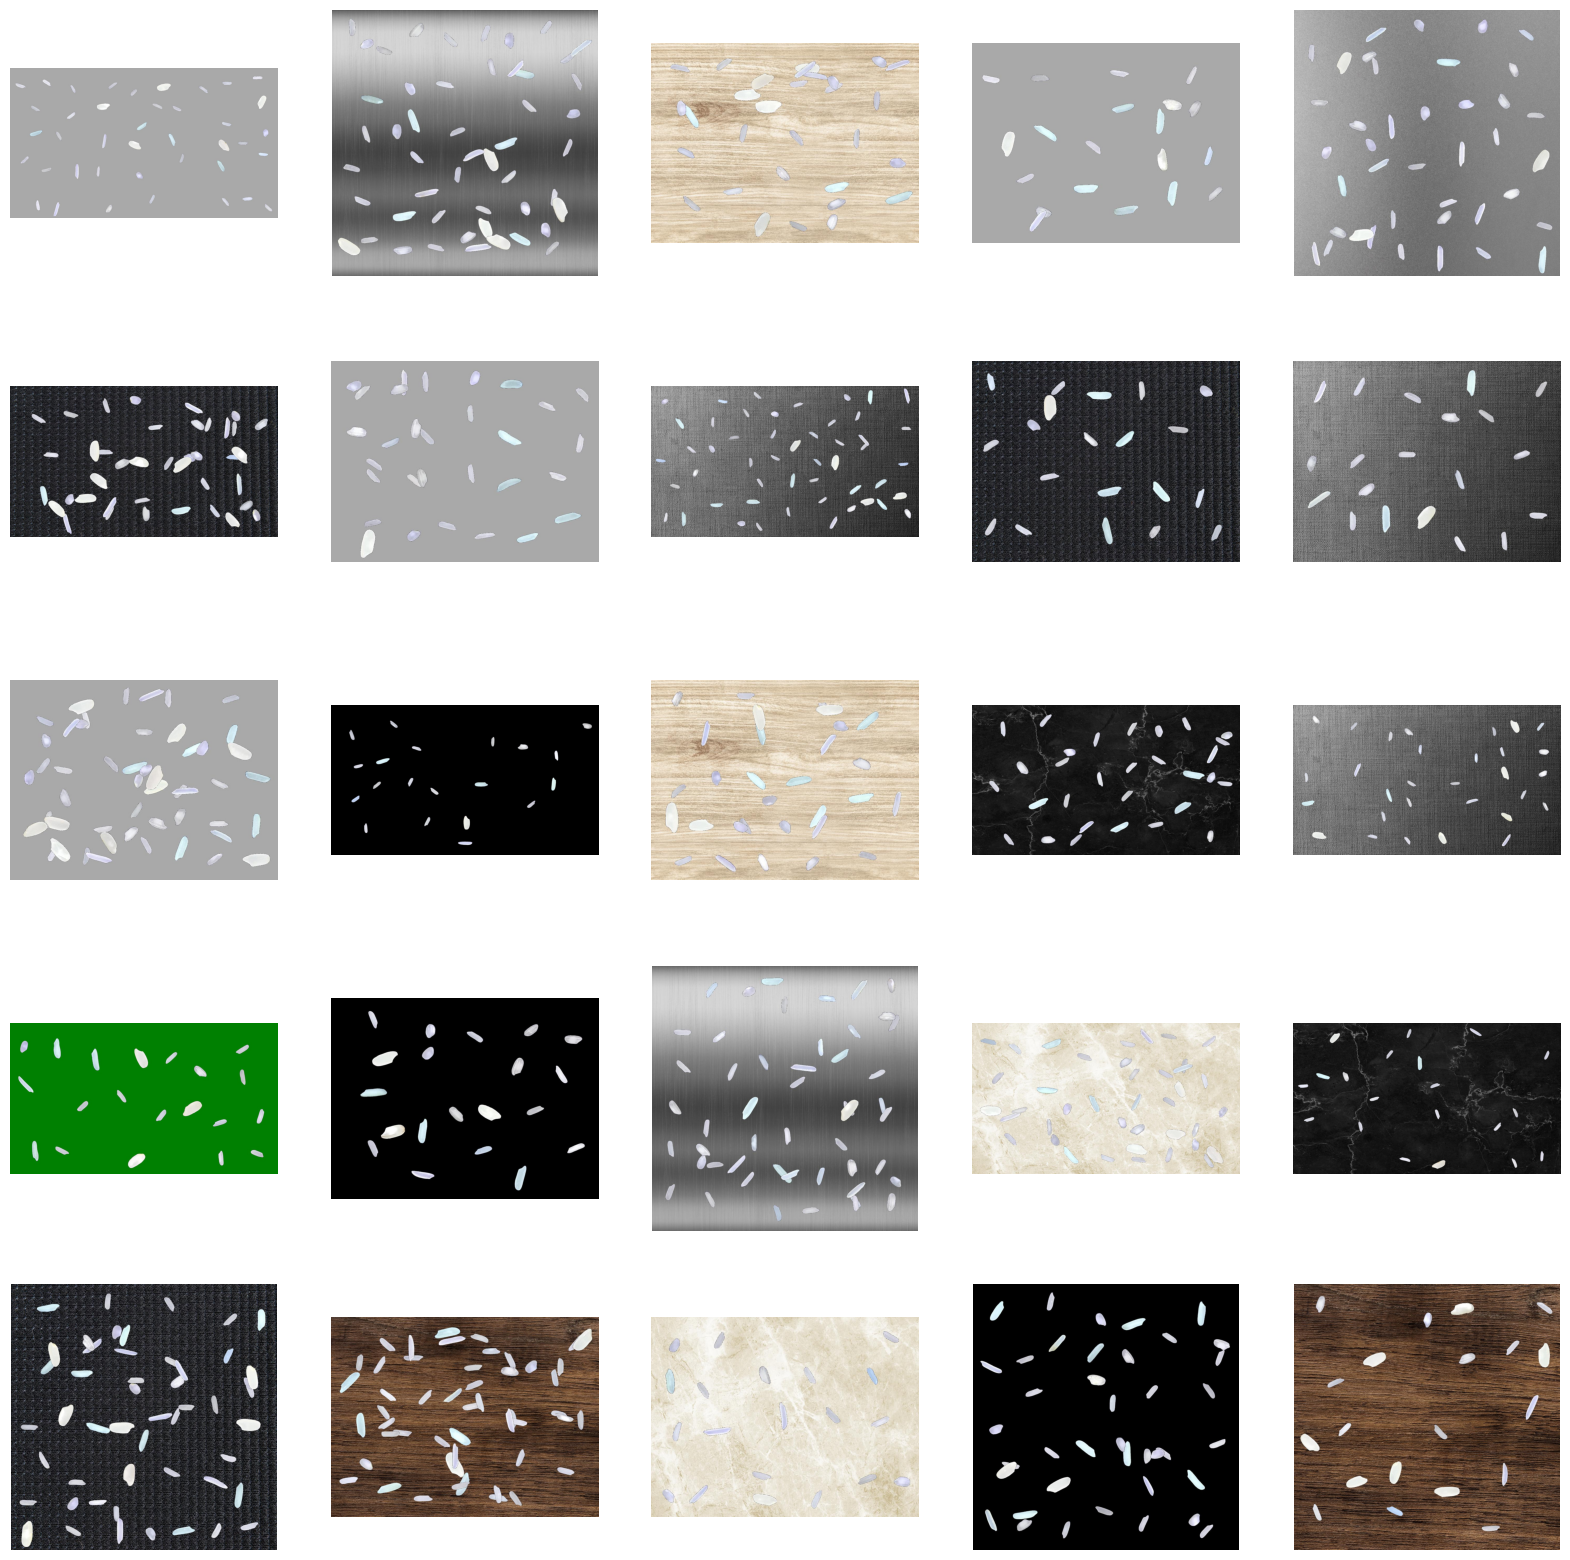

In [82]:
# let's take a look at the synthesized images
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()
syn_image_path = os.listdir("./dataset/images/train")
sample_syn_image = random.sample(syn_image_path, 25)
for i in range(25):
    random_image = cv2.imread(f"./dataset/images/train/{sample_syn_image[i]}")
    random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(random_image)
    axes[i].axis("off")
plt.show()

### The format of the yaml file should be as follows:
```bash
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco8-seg  # dataset root dir
train: images/train  # train images (relative to 'path') 4 images
val: images/val  # val images (relative to 'path') 4 images
test:  # test images (optional)

# Classes (80 COCO classes)
names:
  0: person
  1: bicycle
  2: car
  # ...
  77: teddy bear
  78: hair drier
  79: toothbrush
```

[source](https://docs.ultralytics.com/datasets/segment/#ultralytics-yolo-format)

In [6]:
import yaml

full_path = os.path.abspath("dataset")

yaml_data = dict(
    path = full_path,
    train = "images/train",
    val = "images/val",
    names = [{0: "Jasmine"}, {1: "Non-Jasmine"}]
)

with open("dataset/data.yaml", "w") as f:
    yaml.dump(yaml_data, f, default_flow_style=False, sort_keys=False)

# Training YOLO Segmentation model

In [2]:
epochs = 40
batch = 4
imgsz = 1024

In [5]:
from ultralytics import YOLO

seg_model = YOLO("yolov8l-seg.pt")

yaml_full_path = full_path = os.path.abspath("./dataset/data.yaml")
trained_seg_model = seg_model.train(data=yaml_full_path, epochs=epochs, batch=batch, imgsz=imgsz, device="0", project="rice_segmentation", name="run1", seed=random_seed)

New https://pypi.org/project/ultralytics/8.2.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.40 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\dataset\data.yaml, epochs=2, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=0, workers=8, project=rice_segmentation, name=run17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fa

train: Scanning C:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\dataset\labels\train.cache... 210 images, 10 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]
val: Scanning C:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\dataset\labels\val.cache... 42 images, 2 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<?, ?it/s]


Plotting labels to rice_segmentation\run17\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to rice_segmentation\run17
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/2      2.14G      1.147      1.514      1.419     0.8552        152        320: 100%|██████████| 53/53 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all         42       1410      0.512       0.83      0.528      0.381      0.476      0.762      0.459      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/2      1.87G      0.978      1.194     0.8321     0.8197        178        320: 100%|██████████| 53/53 [00:08<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.68it/s]

                   all         42       1410      0.544      0.818      0.555       0.42      0.495      0.747      0.475      0.228



2 epochs completed in 0.007 hours.
Optimizer stripped from rice_segmentation\run17\weights\last.pt, 92.2MB
Optimizer stripped from rice_segmentation\run17\weights\best.pt, 92.2MB

Validating rice_segmentation\run17\weights\best.pt...
Ultralytics YOLOv8.1.40 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8l-seg summary (fused): 295 layers, 45913430 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]


                   all         42       1410      0.544      0.819      0.555      0.419      0.493      0.745      0.473      0.227
        {0: 'Jasmine'}         42        866      0.863      0.833      0.876      0.653      0.769       0.73       0.73      0.346
    {1: 'Non-Jasmine'}         42        544      0.224      0.805      0.233      0.185      0.216      0.761      0.216      0.109
Speed: 0.2ms preprocess, 12.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to rice_segmentation\run17


# Save the model

In [2]:
run_path = "./rice_segmentation"
model_path = "runxxx" # change this to the model path you want to use
model_path = os.path.join(run_path, model_path)
model_path_pt = os.path.join(model_path, "weights", "best.pt")

In [4]:
to_save_model = YOLO(model_path_pt)
to_save_model.export(format="onnx")
model_path_onnx = os.path.join(model_path, "weights", "best.onnx")

Ultralytics YOLOv8.1.40 🚀 Python-3.11.8 torch-2.2.2+cu121 CPU (AMD Ryzen 7 5800HS with Radeon Graphics)
YOLOv8l-seg summary (fused): 295 layers, 45913430 parameters, 0 gradients, 220.1 GFLOPs

PyTorch: starting from 'rice_segmentation\run17\weights\best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) ((1, 38, 2100), (1, 32, 80, 80)) (88.0 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 2.5s, saved as 'rice_segmentation\run17\weights\best.onnx' (175.3 MB)

Export complete (5.4s)
Results saved to C:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\rice_segmentation\run17\weights
Predict:         yolo predict task=segment model=rice_segmentation\run17\weights\best.onnx imgsz=320  
Validate:        yolo val task=segment model=rice_segmentation\run17\weights\best.onnx imgsz=320 data=c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\dataset\data.yaml  
Visualize:       https://netron.app


In [23]:
import datetime
from pathlib import Path

to_save_path = "./saved_model"
Path(to_save_path).mkdir(parents=True, exist_ok=True)

time = datetime.datetime.now().strftime("%d%m%y%H%M")

# zip run17 folder into name seg-model-<ddmmyyhhmm>.zip
zip_name = f"seg-model-{time}"

shutil.make_archive(f"{to_save_path}/{zip_name}/imgsz{imgsz}", 'zip', model_path)